# UVOD U NEURONSKE MREŽE


Jovana Arsenović, Nikolina Živanović \
Januar, 2025.

Pokušavajući da razumeju kako funkcioniše biološki mozak, da bi projektovali veštačku inteligenciju, McCulloch i Pitts publikovali su 1943. godine prvi koncept pojednostavljene ćelije mozga, tzv. *McCulloch-Pitts (MCP)* neuron. Oni su opisali nervnu ćeliju kao jednostavnu logičku kapiju sa binarnim izlazima - više signala stiže u dendrite, koji se zatim akumuliraju u telo ćelije. Аko akumulirani signal pređe određenu granicu, generisani izlazni signal biće prosleđen aksonom. Nekoliko godina kasnije, Rosenblatt je objavio prvi koncept obučavanja perceptrona na osnovu MCP modela neurona. Rosenblat je predložio algoritam koji bi automatski učio koeficijente optimalne težine, koji bi zatim bili pomnoženi sa sa ulaznim atributima za donošenje odluke da li će se neuron pokrenuti ili ne. U kontekstu mašinskog učenja i klasifikacije, takav algoritam može da se upotrebi za predviđanje da li tačka novog podatka pripada jednoj klasi ili drugoj.
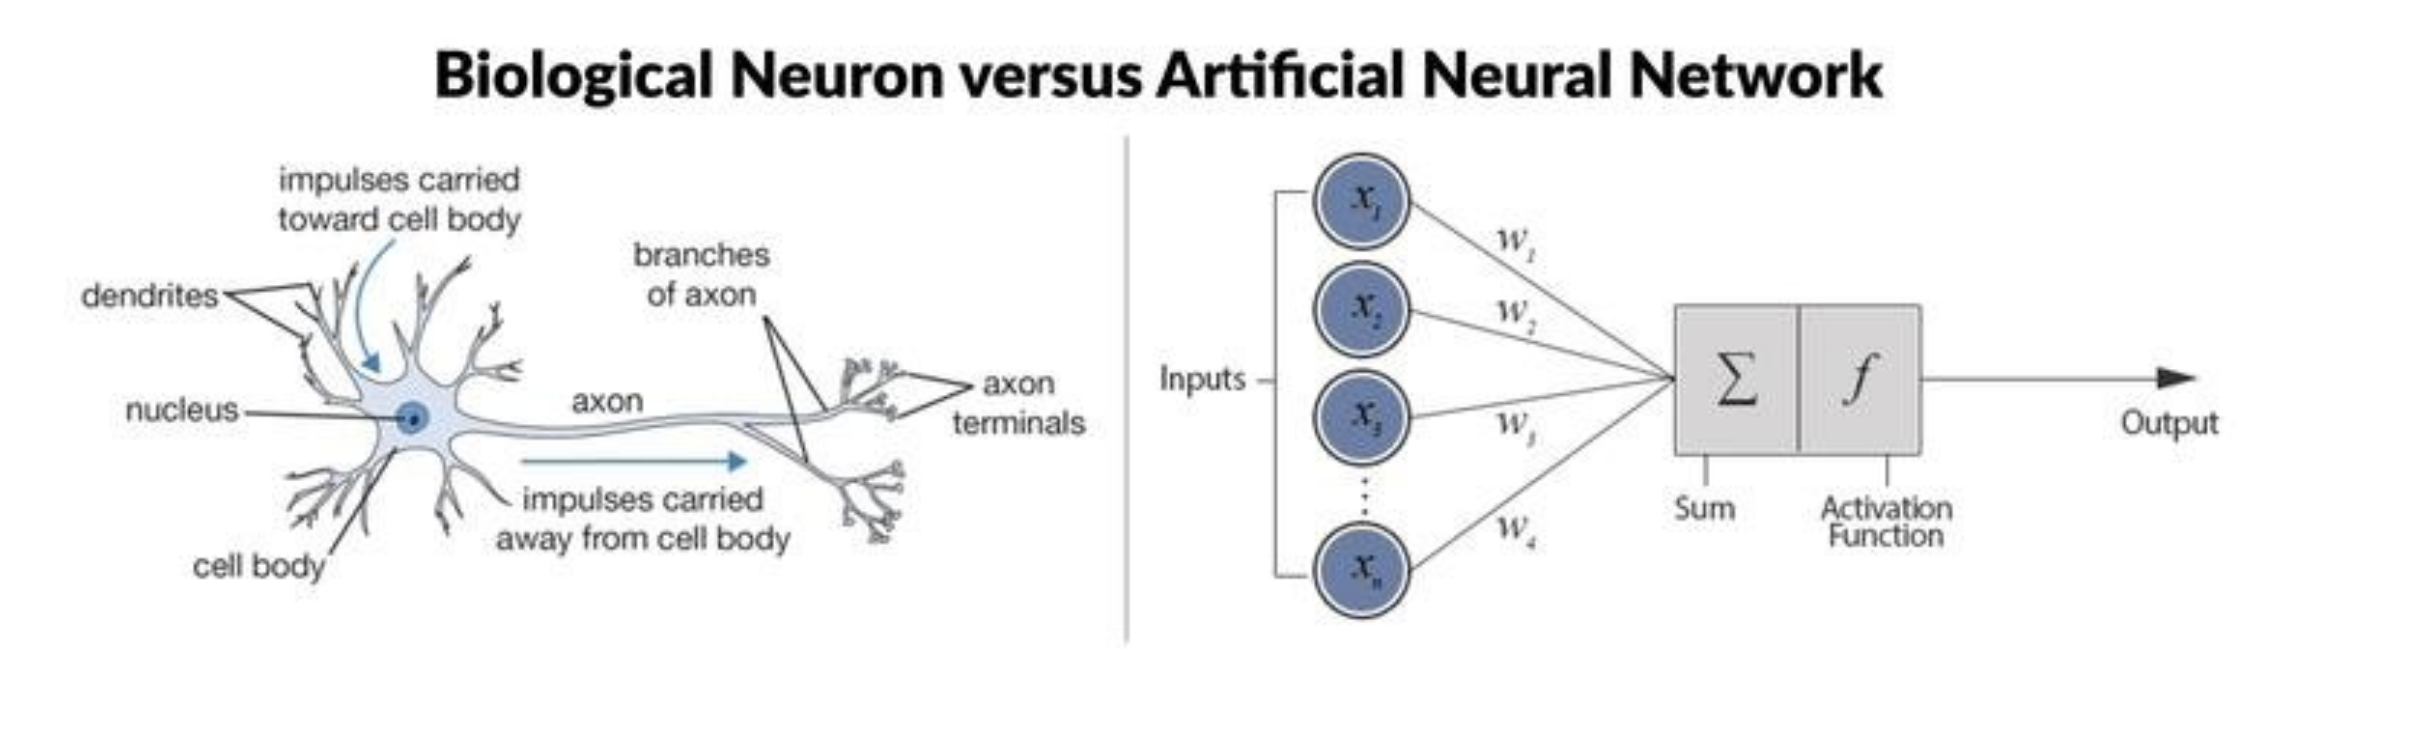

# Formalna definicija veštačkog neurona

Ideju o veštačkom neuronu možemo da predstavimo kao zadatak binarne klasifikacije, klasifikacije sa dve klase: "0" i "1". Može se definisati funkcija odlučivanja (engl. *decision function*) - σ(z), koja koristi linearnu kombinaciju ulaznih vrednosti ***x*** i odgovarajućeg vektora težine ***w***.

* *z* - mrežni ulaz (engl. *net input*):
\begin{align}
        z = \sum_{i=1}^{n} w_i x_i + b \\
\end{align}

Gde su:\
    * $x_i$ su ulazi (obeležja, atributi podataka),\
    * $w_i$ su odgovarajuće težine povezane sa svakim ulazom,\
    * $b$ je bias, $b=-ϴ$,\
    * $n$ je broj ulaza.

Ako je mrežni ulaz određenog primera $x_i$ veći od definisane granice $ϴ$, predviđamo klasu $1$ ili u suprotnom klasu $0$:

\begin{align}
  σ(z) =
\begin{cases}
1 & \text{ako } z \geq 0, \\
0 & \text{ako } z < 0.
\end{cases}
\end{align}


# Pravilo učenja perceptrona

1.   inicijalizacija težina i biasa na 0 ili manje nasumične brojeve
2.   za svaki primer obuke:
  *   izračunati izlaznu/predviđenu vrednost $\hat{y_i}$
  *   ažuriranje težina i biasa

Izlazna vrednost je oznaka klase koja je predviđena jediničnom step funkcijom. Ažuriranje težina i biasa se računa na sledeći način:

\begin{align}
  Δw_j=\eta(y_i-\hat{y_i})x_i^j\\
  Δb=η(y_i-\hat{y_i}).\\
\end{align}

Za razliku od biasa, svaka težina $w^j$ odgovara atributu $x^j$ u skupu podataka. $\eta$ predstavlja brzinu učenja (obično konstanta između 0 i 1). $y_i$ predstavlja **tačnu oznaku klase** i-tog primera za obuku a $\hat{y_i}$ je **predviđena oznaka klase**.



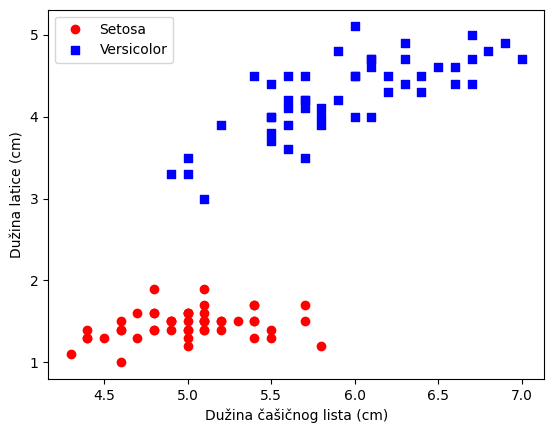

Tačnost na test skupu: 100.00%


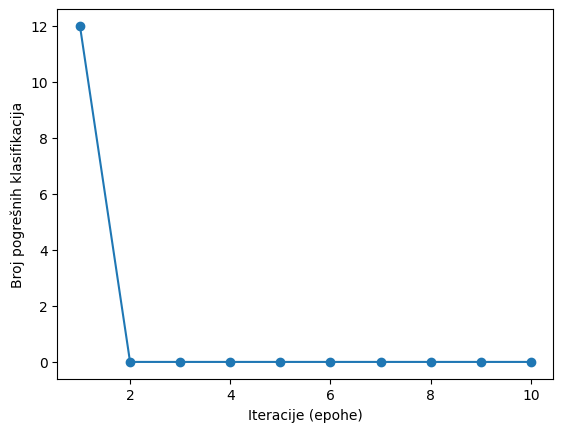

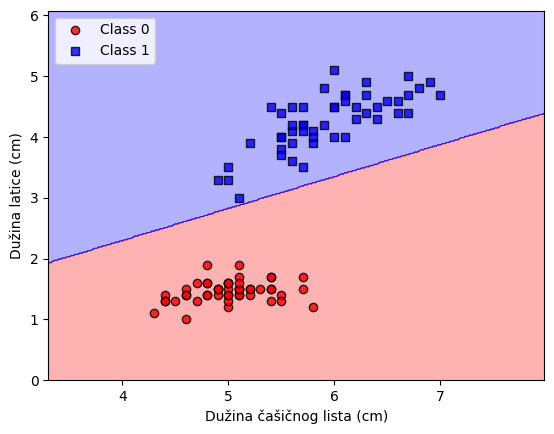

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap










In [16]:
# -------------------------------------------------------------------------- #
#                IMPLEMENTACIJA ALGORITMA PERCEPTRONA                        #

class Perceptron:

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    # brzina ucenja, izmedju 0.0 i 1.0
    self.eta = float(eta)
    # max broj iteracija
    self.n_iter = int(n_iter)
    # random broj za inicijalizaciju tezine
    self.random_state = int(random_state)

  def fit(self, X, y):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y)

    # rgen - generator nasumicnih brojeva
    rgen = np.random.RandomState(self.random_state)

    # Težine za svako obeležje + bias posebno
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]).astype(np.float64)
    self.b_ = 0.0
    self.errors_ = []

    for _ in range(self.n_iter):
    # while i <= self.n_iter:
      errors = 0
      for xi, target in zip(X, y):
        # OVDE JE PRIMENJEN GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA
        update = self.eta * (target - self.predict(xi))
        if update != 0.0:
          self.w_ += update * xi
          self.b_ += update
          errors += 1
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    X = np.asarray(X, dtype=np.float64)
    # racunanje net ulaza
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    # granicna funkcija
    return np.where(self.net_input(X) >= 0.0, 1, 0)

# Testiranje algoritma nad skupom podataka *Iris*

Ovo je jedan od prvih skupova podataka iz literature koji se koristi za tetiranje klasifikacionih algoritama. Skup podataka sadrži 3 klase sa po 50 uzoraka. Svaki uzorak/primer je biljka. Klase biljaka predstavljaju podvrstu cveta iris: setosa, versicolor i virginica. Svaki uzorak opisan je sa 4 obeležja (dužina i širina čašičnog lista i dužina i širina latice) i označen je kojoj klasi pripada. Nema nedostajućih podataka.

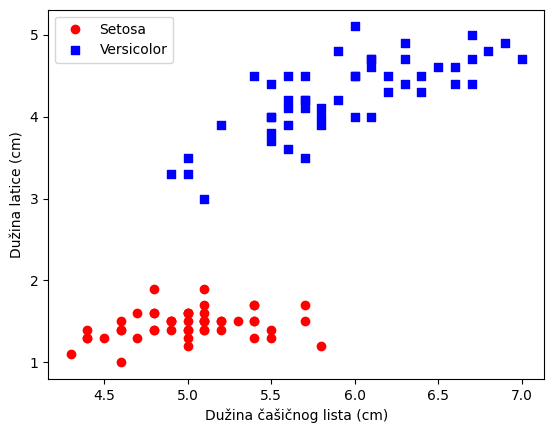

In [17]:
# -------------------------------------------------------------------------- #
#                       PRIKAZIVANJE PODATAKA                                #

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

# dve klase: setosa i versicolor (prvih 100 uzoraka)
# trebaju nam dve klase a ne tri, zbog toga cemo samo uzeti prvih 100 uzoraka
# prvih 50 se odnose na setosu a drugih 50 na versicolor
# 0 stavljamo za setesu, za ostale (versicolor) 1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

'''Pred nama se postavlja zadatak da obučimo model koji će biti u mogućnosti sam
da razlikuje/klasifikuje vrstu cveta na osnovu 4 ulazne vrednosti dužina,
širina lista, dužina i širina latice. Da bi to uradili prvo smo odabrali podatke
za obuku. To su parovi odgvarajucih ulaznih obilezija i odgovarajućih klasa cveta
(izlaza). Ti podaci koriste se da bi percepton naucio kako da klasifikuje.
Od ukupnog skupa odabrano je 80% podataka za obuku i 20% za testiranje.'''

# uzimamo samo dva obeležja za prikazivanje: dužina čašičnog lista (prva kolona) i dužina latice (treća kolona), za prve dve klase
X = df.iloc[0:100, [0, 2]].values.astype(np.float64)

# prikazivanje uzoraka u prostoru obeležja
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Dužina čašičnog lista (cm)')
plt.ylabel('Dužina latice (cm)')
plt.legend(loc='upper left')
plt.show()

Tačnost na test skupu: 100.00%


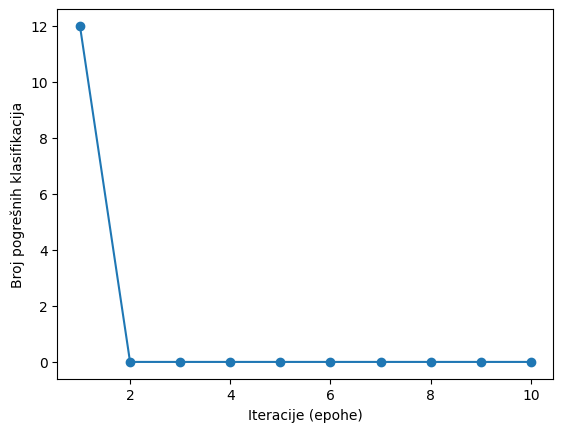

In [18]:
# -------------------------------------------------------------------------- #
#                        OBUCAVANJE PERCEPTRONA                              #

# Podela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treniranje perceptrona
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X_train, y_train)

# Evaluacija modela (na test skupu)
y_pred = ppn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Tačnost na test skupu: {accuracy * 100:.2f}%")

# prikaz greske kroz iteracije/epohe
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteracije (epohe)')
plt.ylabel('Broj pogrešnih klasifikacija')
plt.show()

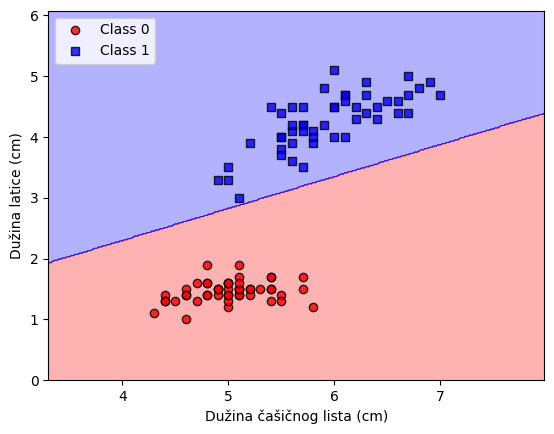

In [19]:
# -------------------------------------------------------------------------- #
#                   ISCRTAVANJE GRANICE ODLUCIVANJA                          #

def plot_decision_regions(X, y, classifier, resolution=0.02):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y)

    markers = ('o', 's', 'v', '<', '>', '^')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'purple', 'pink']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # odredjivanje min i max vrednosti atributa za kreiranje para grid nizova xx1 i xx2
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    # predvidjanje oznaka klasa
    lab = classifier.predict(grid).reshape(xx1.shape)

    # prikazivanje kontura između klasa
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Dužina čašičnog lista (cm)')
plt.ylabel('Dužina latice (cm)')
plt.legend(loc='upper left')
plt.show()

# Prilagodljivi linearni neuroni

Modifikacijom perceptrona može se smatrati ADALINE (engl. Adaptive Linear Neuron) algoritam, koji su 1960. godine publikovali Widrow i Hoff. Ovaj algoritam predstavlja temelj za druge algoritme mašinskog učenja (za klasifikaciju i linearnu regresiju) zato što ilustruje koncepte definisanja i minimizacije kontinualnih funkcija gubitaka (engl. loss function). Ključna razlika između Adaline pravila i Rosenbattovog perceptrona je to što se težine ažuriraju na osnovu **linearne** aktivacione funkcije, umesto na osnovu step funkcije. Ova linearna aktivaciona funkcija je funkcija identiteta net ulaza $σ(z)=z$. Iako je linearna aktivaciona funkcija upotrebljena za učenje težina, za finalno predviđanje/klasifikaciju i dalje se koristi step funkcija.

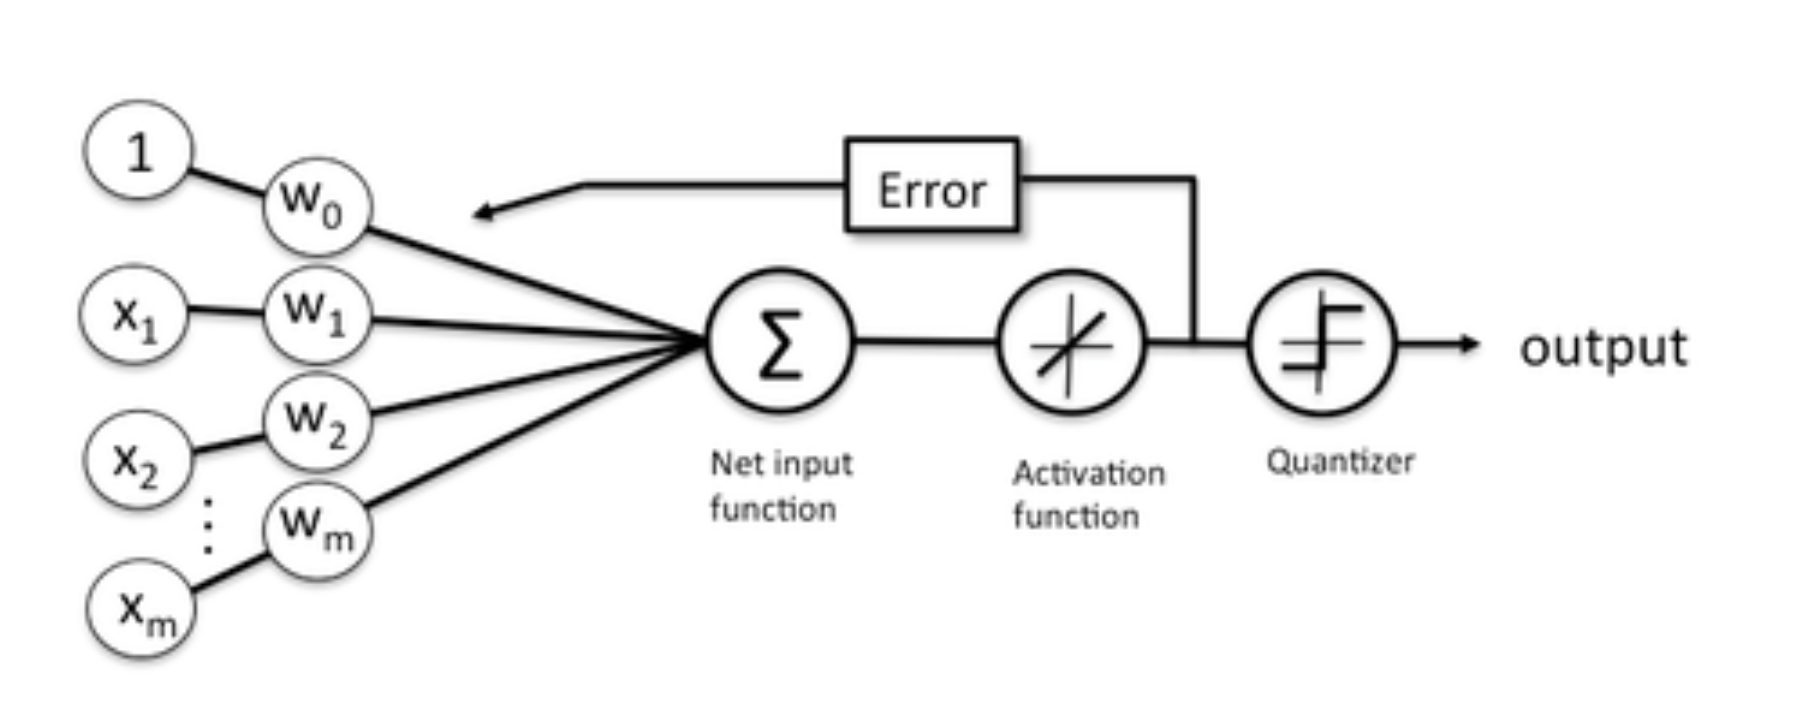

# Minimizacija funkcije gubitaka pomoću metode najbržeg pada (gradijentnog spusta)

Ključni element algoritama nadgledanog učenja je definisana ciljna funkcija (kriterijum optimalnosti) koja bi trebalo da bude optimizovana u toku procesa učenja. Ovaj kriterijum je često funkcija gubitaka ili funkcija cene koju želimo da minimizujemo. U Adaline algoritmu funkciju gubitaka možemo da definišemo kao srednju kvadratnu grešku:
\begin{align}
  L(w,b)=\frac{1}{2n}\sum_{i=1}^{n}(y_i-σ(z_i))^2.\\
\end{align}

Glavna prednost ovako definisane aktivacione funkcije, za razliku od jedinične step funkcije, je što funkcija gubitaka postaje diferencijabilna. Takođe, ova funkcija je koveksna pa može da se primeni optimizacioni algoritam **gradijentnog spusta**  (engl. *gradient decent*) za pronalaženje težine koja minimizuje funkciju gubitaka:
\begin{align}
  Δw_j=-\eta \nabla_wL(w,b) \\
  Δb=-η\nabla_bL(w,b) .\\
\end{align}

In [20]:
# -------------------------------------------------------------------------- #
#                   IMPLEMENTACIJA ADALINE ALGORITMA                         #

class AdalineGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # brzina ucenja, izmedju 0.0 i 1.0
        self.eta = eta
        # broj iteracija
        self.n_iter = n_iter
        # random broj za inicijalizaciju tezine
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # rgen - generator nasumicnih brojeva
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            # OVDE JE PRIMENJEN GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        # racunanje net ulaza
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        # granicna funkcija
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)




# Testiranje algoritma nad skupom podataka *Iris*

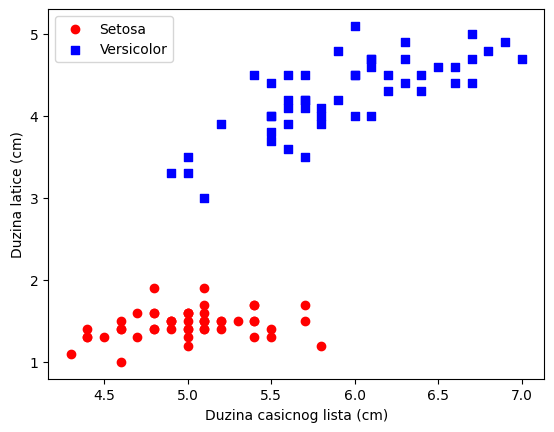

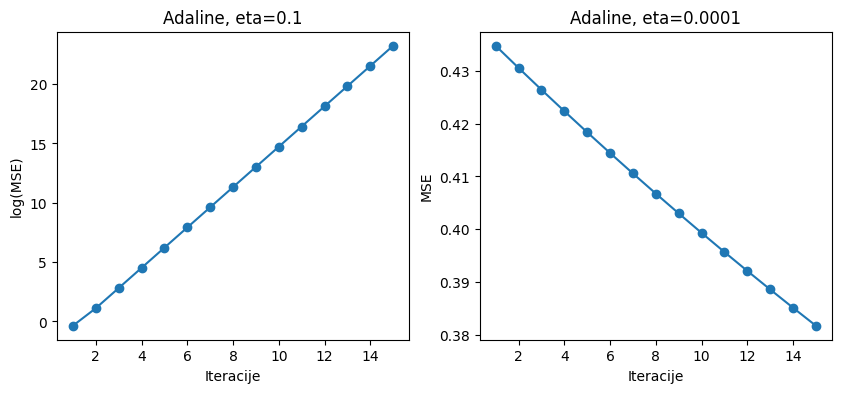

Text(0.5, 1.0, 'Adaline - gradijentni spust')

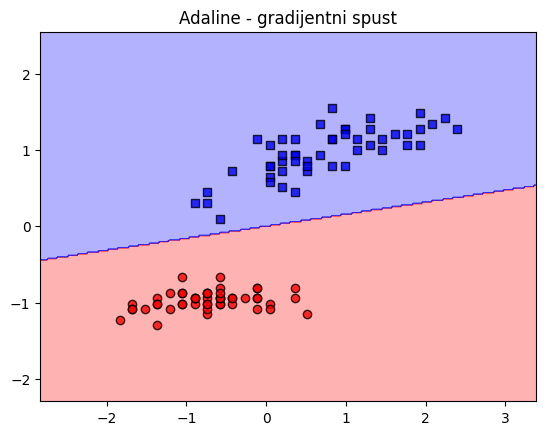

In [21]:
# -------------------------------------------------------------------------- #
#                       PRIKAZIVANJE PODATAKA                                #

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

# trebaju nam dve klase a ne tri, zbog toga cemo samo uzeti prvih 100 uzoraka
# prvih 50 se odnose na setosu a drugih 50 na versicolor
# 0 stavljamo za setesu, za ostale (versicolor) 1
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',0,1)

# uzimamo samo 2 obeležja, dužina čašičnog lista (prva kolona) i dužina latice (treća kolona), za prve dve klase
X = df.iloc[0:100, [0,2]].values

# prikazivanje uzoraka u prostoru obeležja
plt.scatter(X[:50,0],X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Duzina casicnog lista (cm)')
plt.ylabel('Duzina latice (cm)')
plt.legend(loc='upper left')
plt.show()

# -------------------------------------------------------------------------- #
#        ZAVISNOST KONVERGENCIJE ALORITMA U ODNOSU NA BRZINU UCENJA          #

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Iteracije')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline, eta=0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1), ada2.losses_, marker='o')
ax[1].set_xlabel('Iteracije')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline, eta=0.0001')
plt.show()

# -------------------------------------------------------------------------- #
#             STANDARDIZACIJA (skaliranje) ATRIBUTA                          #

X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title('Adaline - gradijentni spust')


# Višeslojna neuronska mreža

### Osnovni elementi



Neuronske mreže se sastoje od "neurona" koji su organizovani u slojeve. Osnovni elementi su:

1. **Ulazni sloj (Input Layer):** Prima početne podatke, često predstavljene vektorom.

2. **Skriveni slojevi (Hidden Layers):** Slojevi koji izvršavaju transformacije nad podacima. Svaki neuron u ovim slojevima povezan je sa svakim neuronom u prethodnom i sledećem sloju.

3. **Izlazni sloj (Output Layer):** Proizvodi konačni rezultat. Broj neurona u ovom sloju zavisi od vrste problema (npr. jedan neuron za binarnu klasifikaciju, više neurona za višeklasnu klasifikaciju).

**Aktivacione funkcije:**

Funkcije aktivacije (npr. sigmoid, tanh, ReLU) koriste se unutar svakog neurona kako bi se postigla nelinearnost i sposobnost modeliranja kompleksnih relacija.

**Propagacija unapred (Feedforward):**

Proces kada podaci putuju kroz mrežu od ulaznog do izlaznog sloja. Formula za izračunavanje izlaza iz neurona može se predstaviti kao:

$ a_j = f\left(\sum_{i=1}^{n} w_{ij} x_i + b_j\right) $

gde su:
- $a_j$ izlaz j-tog neurona,
- $f$ funkcija aktivacije,
- $w_{ij}$ težina veze između i-tog ulaznog neurona i j-tog neurona,
- $x_i$ ulazni podatak i
- $b_j$ pristrasnost (bias).

**Backpropagation:**

Proces optimizacije gde se greška izlaza mreže koristi za prilagođavanje težina kako bi se minimizovala greška. Formule za ažuriranje težina mogu se izraziti pomoću *gradijentnog spusta*. Postoje različite modifikacije algoritma gradijentnog spusta kao što su osnovna verzija gradijentnog algoritma, ADAM, ADAGRAD, gradijent sa momentumom, itd. U nastavku je dat primer primene osnovne verzije algoritma, gradijentnog spusta

$w_{ij}^{(\text{novi})} = w_{ij} - \gamma \frac{\partial E}{\partial w_{ij}} $

gde su:
- $w_{ij}^{(\text{novi})}$ nova težina,
- $\gamma$ stopa učenja,
- $E$ greška izlaza.

Ovo su osnovni koncepti neuronskih mreža sa nekim od osnovnih formula.

## Aktivacione funkcije

U ovoj sekciji prikazana je implementacija aktivacionih funkcija. Podsećamo to su to funkcije, najčešće nelinearne, koje modeluju ponašanje neurona. Neki od primera ovih funkcija bile bi: sigmoid, ReLU, tanh itd. U ovoj skripti biće prikazane implementacije nekoliko aktivacionih funkcija, a u literaturi možete pronaći da se definiču u različitim oblicima.

In [22]:
# Sigmoid funkcija

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [23]:
# Tanh funkcija

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [24]:
# ReLU funkcija

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [25]:
# Leaky ReLU funkcija

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [26]:
# Softmax funkcija (za izlazni sloj kod klasifikacije)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # Stabilizacija numeričkih vrednosti
    return e_x / e_x.sum(axis=0)

In [27]:
# Linearna aktivaciona funkcija (korisna za regresione probleme)
def linear(x):
    return x

def linear_derivative(x):
    return 1

##Normalizacija podataka

Normalizacija podataka je tehnika koja se koristi za skaliranje ulaznih vrednosti u određeni opseg, najčešće između 0 i 1 ili -1 i 1. Cilj ovog procesa je da se podaci učine pogodnijim za obradu u algoritmima mašinskog učenja, uključujući neuronske mreže.

Normalizacija je posebno važna kada podaci imaju različite opsege vrednosti, jer to može otežati ili usporiti proces obuke modela. Na ovaj način se postiže brža konvergencija algoritma optimizacije i stabilniji trening mreže.

Najčešće metode normalizacije uključuju:
- **Min-Max skaliranje**:
  $$x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$
- **Z-score standardizacija**:
  $$x' = \frac{x - \mu}{\sigma}$$
  gde je $\mu$ srednja vrednost, a $\sigma$ standardna devijacija.


Normalizovani podaci poboljšavaju performanse modela, posebno kod neuronskih mreža, gde velike razlike u vrednostima mogu izazvati probleme sa propagacijom kroz slojeve.


## Regresija pomoću neuronskih mreža ##

Kako bi izgledao primer pravljenja modela neuronske mreže za predikciju vrednosti funkcije dato je u nastavku.

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Napravimo klasu za NN
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicijalizuju se težine i bijasi (Svaki neuron se sastoji od težina i bijasa)
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def forward(self, inputs):
        # Propagacija podataka unapred kroz mrežu --> Proces kada podaci putuju kroz mrežu od ulaznog do izlaznog sloja.
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.biases_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input) # Aktivaciona funkcija

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_output
        self.predicted_output = sigmoid(self.output_layer_input) # Aktivaciona funkcija

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation deo obuke, gde se vrši optimizivanje, odnosno "update" težina i bijasa
        error = targets - self.predicted_output

        output_delta = error * sigmoid_derivative(self.predicted_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)

        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # "Update" težina i bijasa
        # OVDE JE PRIMENJEN KLASIČNI GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA ZA SVE SLOJEVE!
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Funkcija za treniranje mreže kojoj se prosleđuju podaci ulaza, izlaza, broj epoha učenja
    # Learning_rate parametar za učenje u klasičnom graijentnom algoritmu
    def train(self, inputs, targets, epochs, learning_rate):
        loss_history = []

        for epoch in range(epochs):
            # Forward pass
            predicted_output = self.forward(inputs)

            # Calculate and store loss - Računanje greške predikcije
            loss = np.mean(0.5 * (targets - predicted_output) ** 2)
            loss_history.append(loss)

            # Backward pass and weight update - Poziv funkcije da bi se update-ovale vrednosti parametara mreže
            self.backward(inputs, targets, learning_rate)

            # Print the loss every 100 epochs - epoch su iteracije izvršavanja (tj. obuke algoritma, primene gradijentnog algoritma)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return loss_history



U nastavku je prikazan primer pravljenja i primene NN mreže, za potrebe testiranja koda.
Mreža je sledeće arhitekture:
 2 ulazna sloja, 4 skrivena sloja i 1 izlazni sloj.

*   Veličina ulaznog sloja: $2$
*   Veličina skrivenog sloja: $4$
*   Veličina izlaznog sloja: $1$
*   Obuka: Primenom gradijentnog algoritma
*   Learning rate $γ=0.1$
*   Broj epoha: $1000$





Epoch 0, Loss: 0.16193297581582253
Epoch 100, Loss: 0.0856254162778908
Epoch 200, Loss: 0.0856254162778908
Epoch 300, Loss: 0.0856254162778908
Epoch 400, Loss: 0.0856254162778908
Epoch 500, Loss: 0.0856254162778908
Epoch 600, Loss: 0.0856254162778908
Epoch 700, Loss: 0.0856254162778908
Epoch 800, Loss: 0.0856254162778908
Epoch 900, Loss: 0.0856254162778908


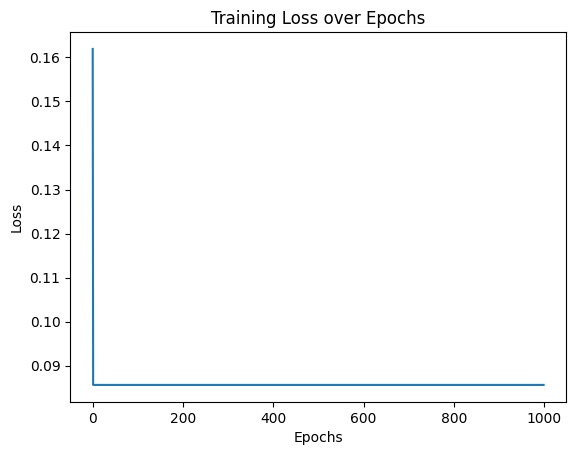

In [31]:
# Veštački generisani podaci
np.random.seed(42)
inputs = np.random.rand(1000, 2)
targets = (inputs[:, 0] + inputs[:, 1]).reshape(-1, 1)

# Inicijalizacija i postavka arhitekture mreže
input_size = 2 # jer imamo dve ulazne vrednosti, primetite imputs je dimenzije 2
hidden_size = 4 # jedan skriveni sloj sa 4 neurona, probajte samostalno da napravite sa više slojeva
output_size = 1 # jer je izlaz, target jedna vrednost
learning_rate = 0.1
epochs = 1000


# Pravljenje same mreže
model = NeuralNetwork(input_size, hidden_size, output_size)
# Treniranje, tj. obuka prethodno napravljanje mreže
loss_history = model.train(inputs, targets, epochs, learning_rate)

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Regresija pomoću neuronskih mreža koristi se za fitovanje podataka, tj. za modelovanje odnosa između ulaznih i izlaznih vrednosti. Cilj je da mreža nauči funkciju koja što bolje aproksimira uzorak u podacima. Ovo se postiže kroz optimizaciju težina i bijas vrednosti u slojevima mreže, tako da predikcija mreže minimalno odstupa od stvarnih vrednosti.

Za fitovanje podataka u regresiji:

Ulazni podaci se transformišu kroz slojeve mreže.
Izlazni sloj predviđa kontinuiranu vrednost koja se upoređuje sa stvarnim vrednostima.
Obuka minimizuje grešku koristeći funkciju poput Mean Squared Error (MSE).
Regresija se koristi u zadacima kao što su predviđanje cena, vremenskih serija i drugih kontinuiranih podataka.

U nastavku prikazujemo primer primene neuronske mreže koja treba da modeluje ponašanje funkcije

 $y=4+3x$.


Epoch 0, Loss: 0.6774019282635695
Epoch 100, Loss: 0.333720284751222
Epoch 200, Loss: 0.3032130351922822
Epoch 300, Loss: 0.2968955428414361
Epoch 400, Loss: 0.29439091799265243


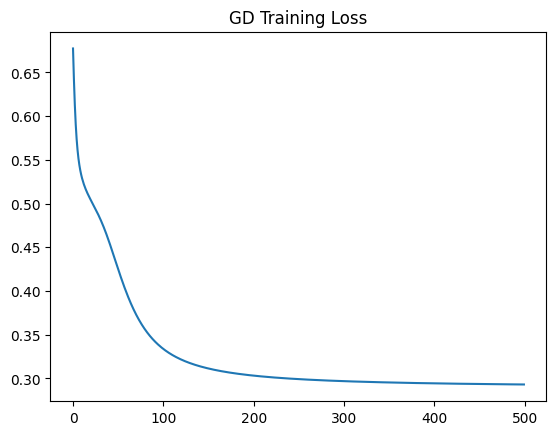

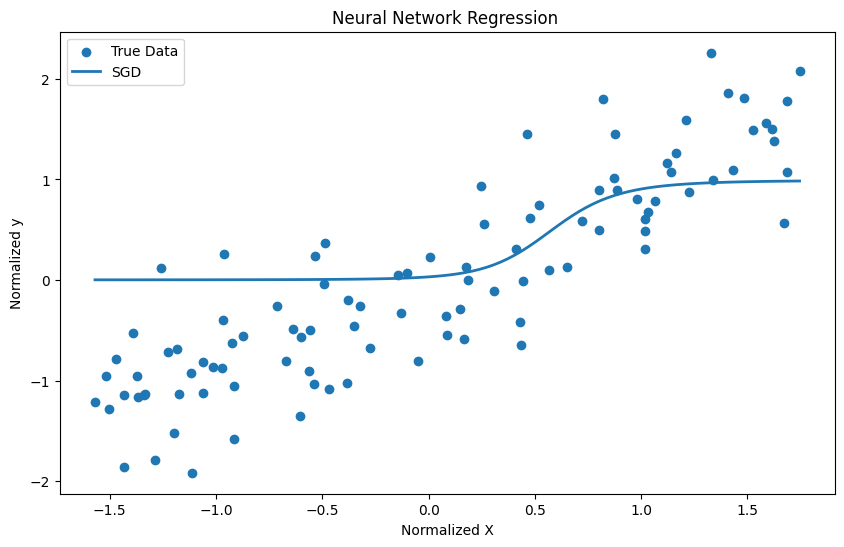

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Podatke veštački generišemo, uzmemo neke vrednosti za x,
# Izračunamo kolika bi bila vrednost izlaza iz funcije za te vrednosti i dodamo malo "šuma" na to
# sa np.random.randn --> Generisali smo podatke čiji trend liči na željenu funkciju.

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normalizacija podataka
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

# Hiperparametri NN mreže, tj. parametri njene arhitekture
input_size = 1
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 500

# Pravljenje modela mreže
model = NeuralNetwork(input_size, hidden_size, output_size)
loss_history = model.train(X_normalized, y_normalized, epochs, learning_rate)


# Prikaz kako se menjala greška izlaza pri procesu obuke
plt.plot(loss_history)
plt.title('GD Training Loss')

plt.show()

# Testiranje mreže na podacima koje mreža "nije videla", tj. nad kojima nije trenirana
X_test = np.linspace(X_normalized.min(), X_normalized.max(), 100).reshape(-1, 1)
y_pred_gd = model.forward(X_test)


# Uporedni prikaz stvarnih izlaznih podataka i onoga što je mreža predvidjela
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, label='True Data')
plt.plot(X_test, y_pred_gd, label='SGD', linewidth=2)

plt.title('Neural Network Regression ')
plt.xlabel('Normalized X')
plt.ylabel('Normalized y')
plt.legend()
plt.show()


##Klasifikacija pomoću neuronskih mreža

Klasifikacija pomoću neuronskih mreža koristi se za rešavanje problema gde je cilj dodeliti ulaznim podacima jednu od nekoliko klasa. Neuronske mreže u ovom kontekstu uče da modeluju granice između klasa u prostoru podataka na osnovu ulazno-izlaznih primera.

Kod binarne klasifikacije u izlaznom sloju nalazi se jedan neuron, gde se na osnovu vrednosti njegove aktivacione funkcije uzorak smešta u jednu od dve klase. U slučaju višeklasne klasifikacije izlazni sloj ima broj neurona jednak broju klasa, gde svaki neuron daje verovatnoću pripadnosti jednoj klasi.

Za klasifikaciju:
- **Aktivaciona funkcija izlaznog sloja** često je **softmax**:
  $$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$$
  gde  $z_i$ predstavlja izlaz i-tog neurona.
- **Funkcija greške** je obično **Cross-Entropy Loss**:
  $$L = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{y}_{ik})$$
  gde su:
  - $y_{ik}$ stvarne vrednosti izlaza,
  - $\hat{y}_{ik}$ predikcije mreže,
  - $K$ broj klasa, a $N$ broj uzoraka.

Ova metoda se koristi za zadatke kao što su prepoznavanje slika, klasifikacija teksta i kategorizacija podataka, gde je cilj razvrstati podatke u diskretne kategorije.


Primenu neuronskih mreža u klasifikaciji demonstriraćemo na primeru klasifikacije brojeva na osnovu toga da li su veći ili manji od proseka. Dakle, u pitanju je problem binarne klasifikacije.


**Zadatak: Klasifikacija brojeva na osnovu njihovih vrednosti u odnosu na prosek**

U ovom zadatku, cilj je klasifikovati brojeve u dve klase na osnovu njihove vrednosti u odnosu na prosek skupa brojeva.


1.  **Generisanje podataka:**

  Generišemo niz brojeva od 1 do 1000.\
2.  **Klasifikacija**

  Klasifikujemo svaki broj kao:
- **Klasa 1**: Ako je broj veći ili jednak proseku skupa brojeva.
- **Klasa 0**: Ako je broj manji od proseka skupa brojeva.



3. **Podela podataka**

  Podelićemo podatke na dva skupa:
  - Skup za obuku modela (70% podataka).
  - Skup za testiranje modela (30% podataka).

4. **Treniranje modela**

  Koristimo jednostavnu neuronsku mrežu sa jednim skrivenim slojem za obučavanje modela.

5. **Evaluacija**

  Procenjujemo tačnost modela na testnim podacima i ispisujemo koji su brojevi klasifikovani kao "Veći ili jednak proseku".

**Potrebno je:**
- Implementirati model za klasifikaciju.
- Ispisati tačnost modela na testnim podacima.
- Ispisati koji brojevi su klasifikovani kao "Veći ili jednak proseku" i koji su manji.
- Ispitati kako različite postavke modela (broj neurona, broj epoha, veličina skupa podataka) utiču na tačnost klasifikacije.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Aktivaciona funkcija
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Sprečavanje log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Klasa za neuronsku mrežu
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.biases_output = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backward(self, X, y, learning_rate):
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output_input)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_input)

        # OVDE JE PRIMENJEN KLASIČNI GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA ZA SVE SLOJEVE!
        self.weights_hidden_output -= np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.biases_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden -= np.dot(X.T, hidden_delta) * learning_rate
        self.biases_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = cross_entropy_loss(y, y_pred)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return loss_history

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)  # Predikcija 0 ili 1

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generišemo 1D podatke
X = np.array([i for i in range(1, 1001)])  # Brojevi od 1 do 1000
y = np.array([1 if i >= np.mean(X) else 0 for i in X])  # Klasifikacija: 1 ako je broj >= prosek, 0 ako nije

# Podelimo podatke na obučavajući i testni skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state=42, da bismo pri svakom pokretanju koda imali istu podelu podataka

# Preoblikujemo (1D podaci treba da budu u formi [n_samples, n_features])
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Normalizacija podataka (opseg [0, 1])
min_value = np.min(X_train)
max_value = np.max(X_train)
X_train_normalized = (X_train - min_value) / (max_value - min_value)
X_test_normalized = (X_test - min_value) / (max_value - min_value)

# Kreiramo i obučavamo model (smanjeni broj neurona i epoha)
model = NeuralNetwork(input_size=1, hidden_size=5, output_size=1)
epochs = 2000
learning_rate = 0.1
loss_history = model.train(X_train_normalized, y_train.reshape(-1, 1), epochs, learning_rate)

# Predikcija na test skupu
y_pred = model.predict(X_test_normalized)

# Ispis rezultata
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Ispisujemo prosek i kako su brojevi klasifikovani
mean_value = np.mean(X)
print(f"Prosek (mean) skupa podataka: {mean_value}")

# Ispisujemo koje brojeve je model klasifikovao kao "Veći ili jednak proseku"
for i, pred in zip(X_test.flatten(), y_pred):
    if pred == 1:
        print(f"Broj {i} je Veći ili jednak proseku")
    else:
        print(f"Broj {i} je Manji od proseka")

Epoch 0, Loss: 0.3491
Epoch 100, Loss: 0.0106
Epoch 200, Loss: 0.0089
Epoch 300, Loss: 0.0074
Epoch 400, Loss: 0.0064
Epoch 500, Loss: 0.0056
Epoch 600, Loss: 0.0051
Epoch 700, Loss: 0.0047
Epoch 800, Loss: 0.0043
Epoch 900, Loss: 0.0040
Epoch 1000, Loss: 0.0038
Epoch 1100, Loss: 0.0036
Epoch 1200, Loss: 0.0034
Epoch 1300, Loss: 0.0032
Epoch 1400, Loss: 0.0031
Epoch 1500, Loss: 0.0029
Epoch 1600, Loss: 0.0028
Epoch 1700, Loss: 0.0027
Epoch 1800, Loss: 0.0026
Epoch 1900, Loss: 0.0025
Test Accuracy: 98.33%
Prosek (mean) skupa podataka: 500.5
Broj 522 je Veći ili jednak proseku
Broj 738 je Veći ili jednak proseku
Broj 741 je Veći ili jednak proseku
Broj 661 je Veći ili jednak proseku
Broj 412 je Manji od proseka
Broj 679 je Veći ili jednak proseku
Broj 627 je Veći ili jednak proseku
Broj 514 je Veći ili jednak proseku
Broj 860 je Veći ili jednak proseku
Broj 137 je Manji od proseka
Broj 812 je Veći ili jednak proseku
Broj 77 je Manji od proseka
Broj 637 je Veći ili jednak proseku
Broj 974

# Obratiti pažnju

* Probajte kako biste rešili problem sa nekom od sledećih modifikacija: druga arhitektura mreže, više skrivenih slojeva. Npr može imati dva skrivena sloja, u prvom skrivenom sloju 3 neurona u drugom 4 itd.
*   Kako različite aktivacione funkcije utiču na rezultate?
*   Kako biste implementirali različite gradijentne algoritme, od onih koji su rađeni na predavanjima. Šta koji od parametara predstavlja? Gde su ovi algoritmi implementirani u kodu, gde biste trebali napraviti izmene?
*  Kako da generište podatke za obuku na osnovu date funkcije koja ne mora da bude jednodimenziona, kao ova u primeru regresije?
*  Itd.....

